In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [14]:
def visualize_prediction(confidence, first_f, last_f, no_features, name_time_column, dataframe, title, location_line, line=False):
    fig, axes = plt.subplots(2, 2, figsize=(15,15), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(first_f,last_f):
        sns.scatterplot(data=dataframe, 
                        x=name_time_column, 
                        y=columns[i], 
                        ax=ax[i-first_f], 
                        label="target", 
                        palette="Greys")
        sns.lineplot(data=dataframe, 
                     x=name_time_column, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_f], 
                     label="predicted", 
                     palette="Blues")
        ax[i-first_f].fill_between(dataframe[i+no_features].values - confidence * dataframe[i+2*no_features].values, 
                              dataframe[i+no_features].values + confidence * dataframe[i+2*no_features].values, 
                              alpha=0.2, 
                              color='blue')
        if line:
            ax[i-first_f].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
        ax[i-first_f].set(xlabel='up time', ylabel='sensor value')
        ax[i-first_f].set(title=columns[i])
        plt.setp(ax[i-first_f].get_xticklabels(), rotation=45) 
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [15]:
def visualise_mle_prediction(dataframe, no_features, first_feature, last_feature, location_line, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     color="black")
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1)
        
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )   

## Change of Degeneration Level

In [16]:
start_phase_1 = 24030
start_phase_2 = 37076

# Visualisation of Prediction - Cpps Data with large degeneration
## Phase 0 - no error

In [17]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_degradation_09_with_label.csv", sep=";")
artifical_data = artifical_data.iloc[:start_phase_1+100,:]

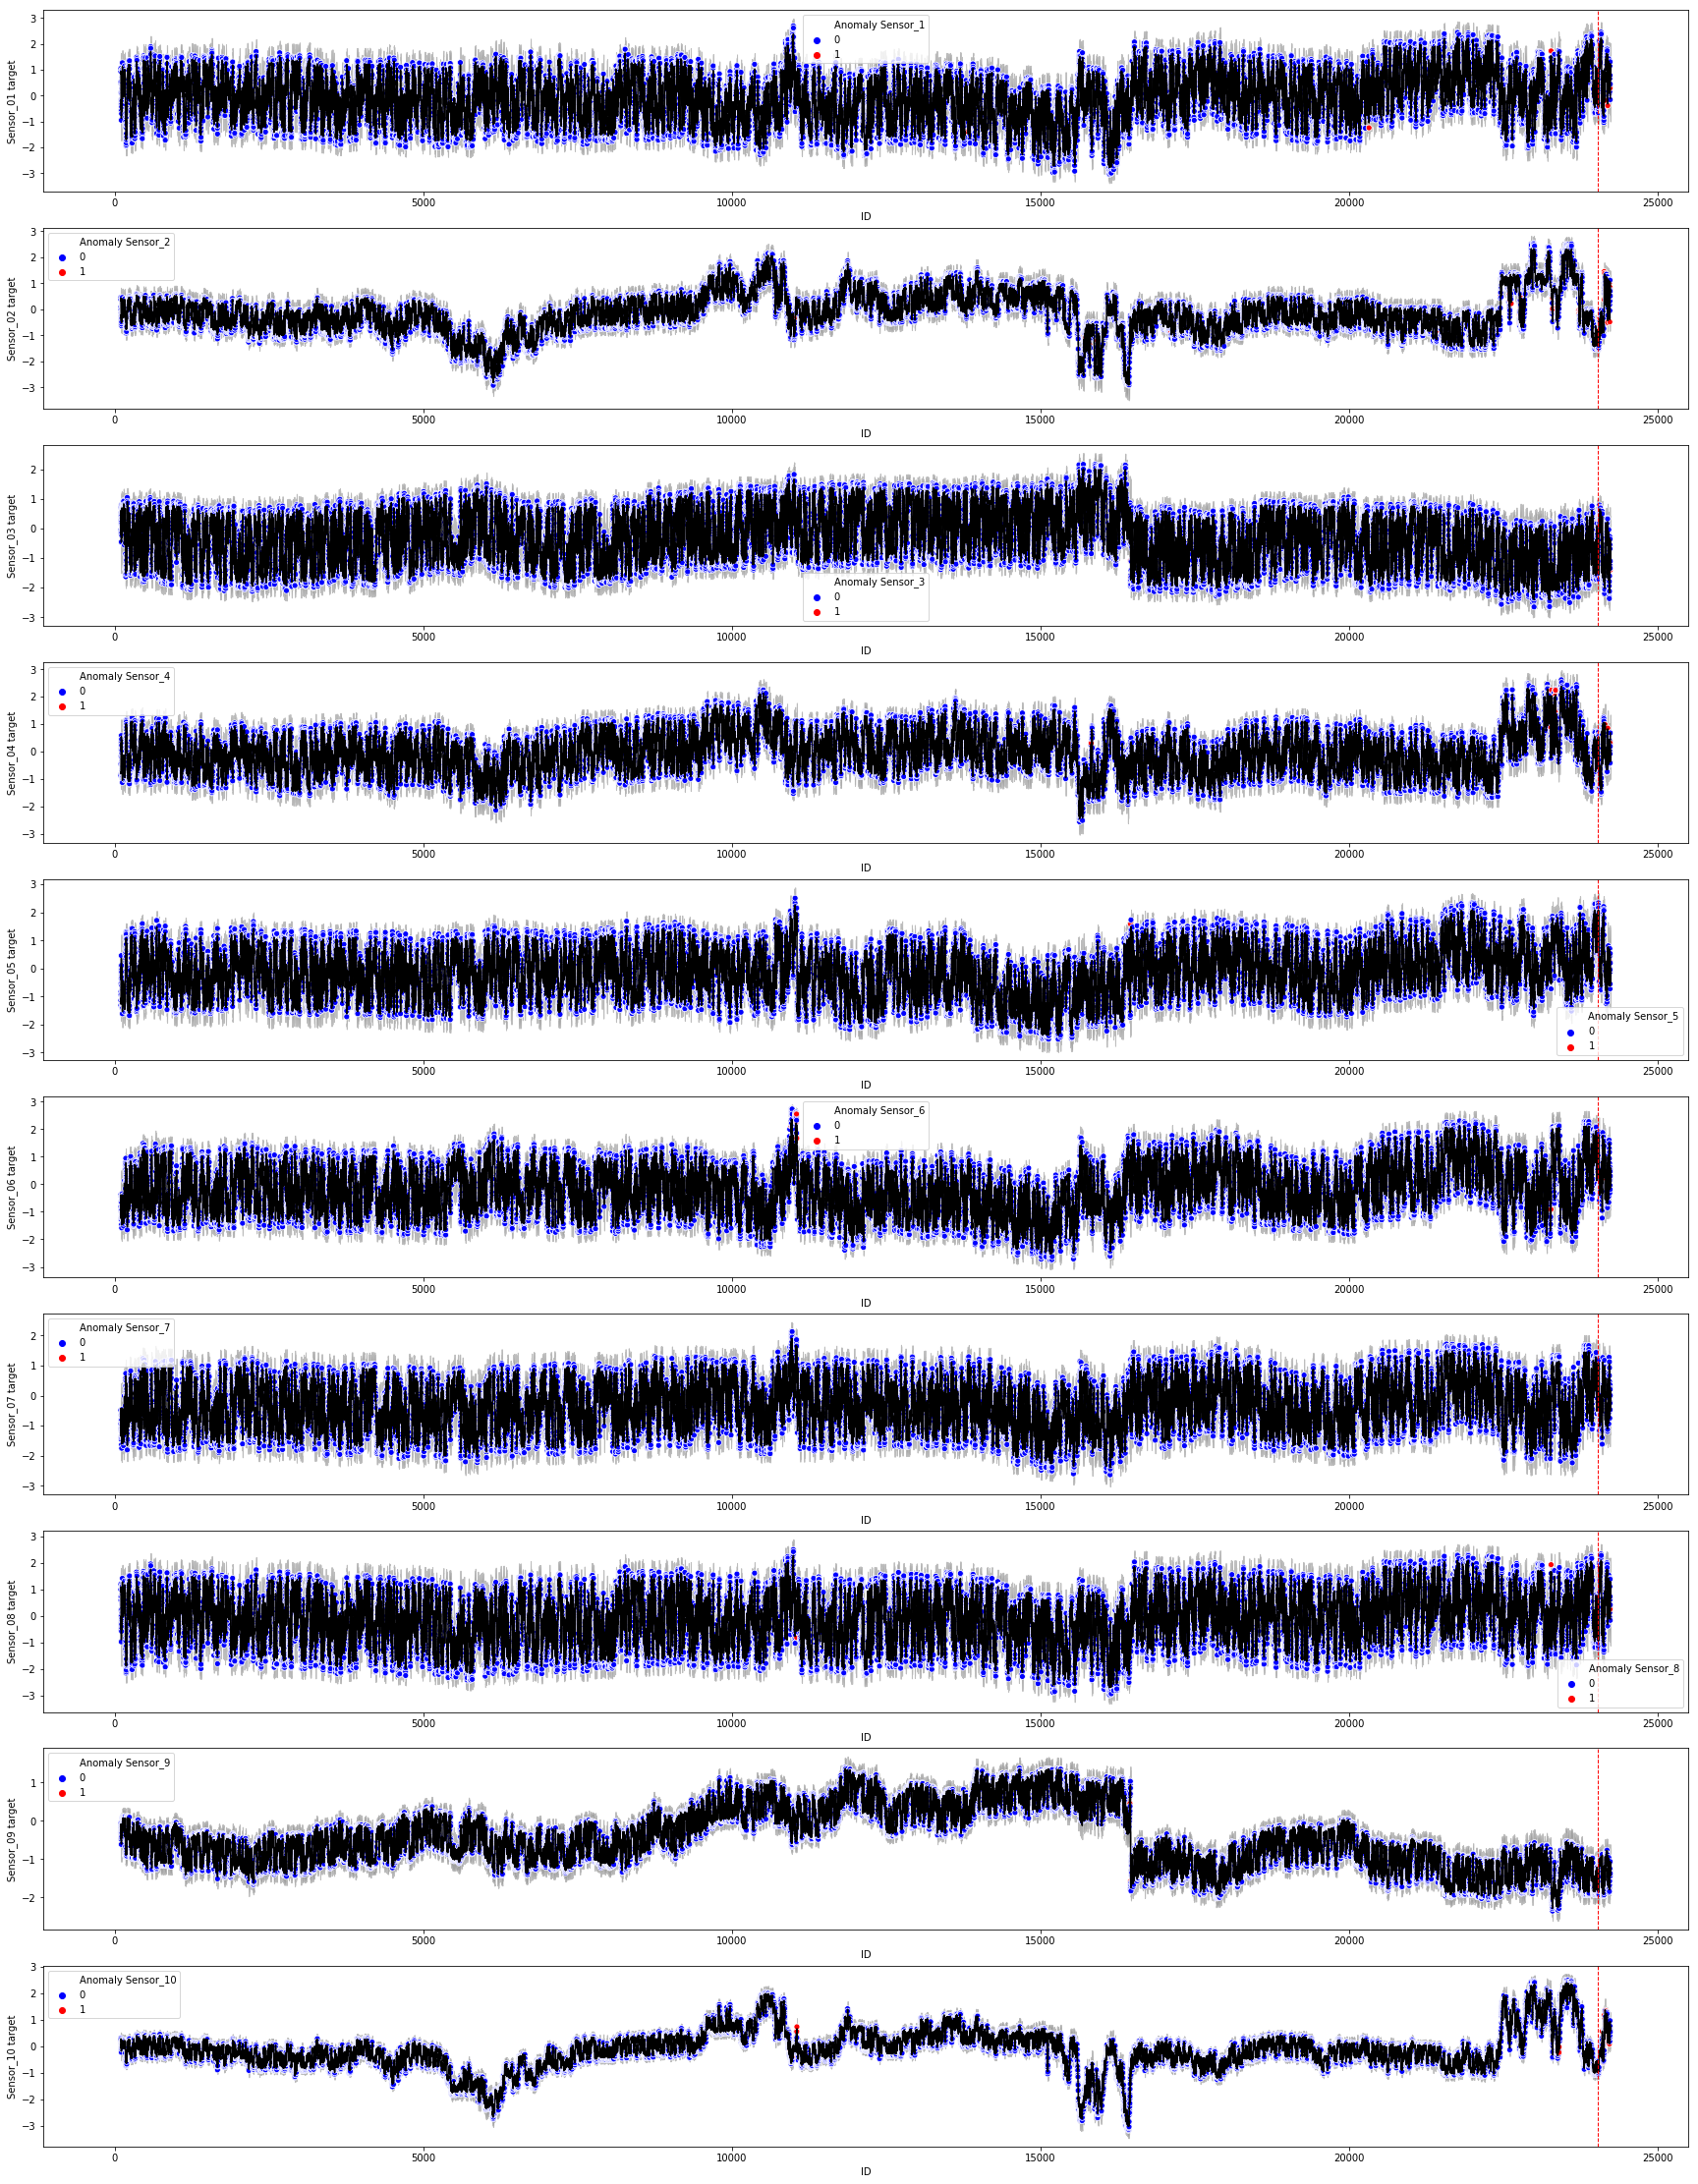

In [18]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 0 to Phase 1

In [19]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_degradation_09_with_label.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_1-200:30000,:]

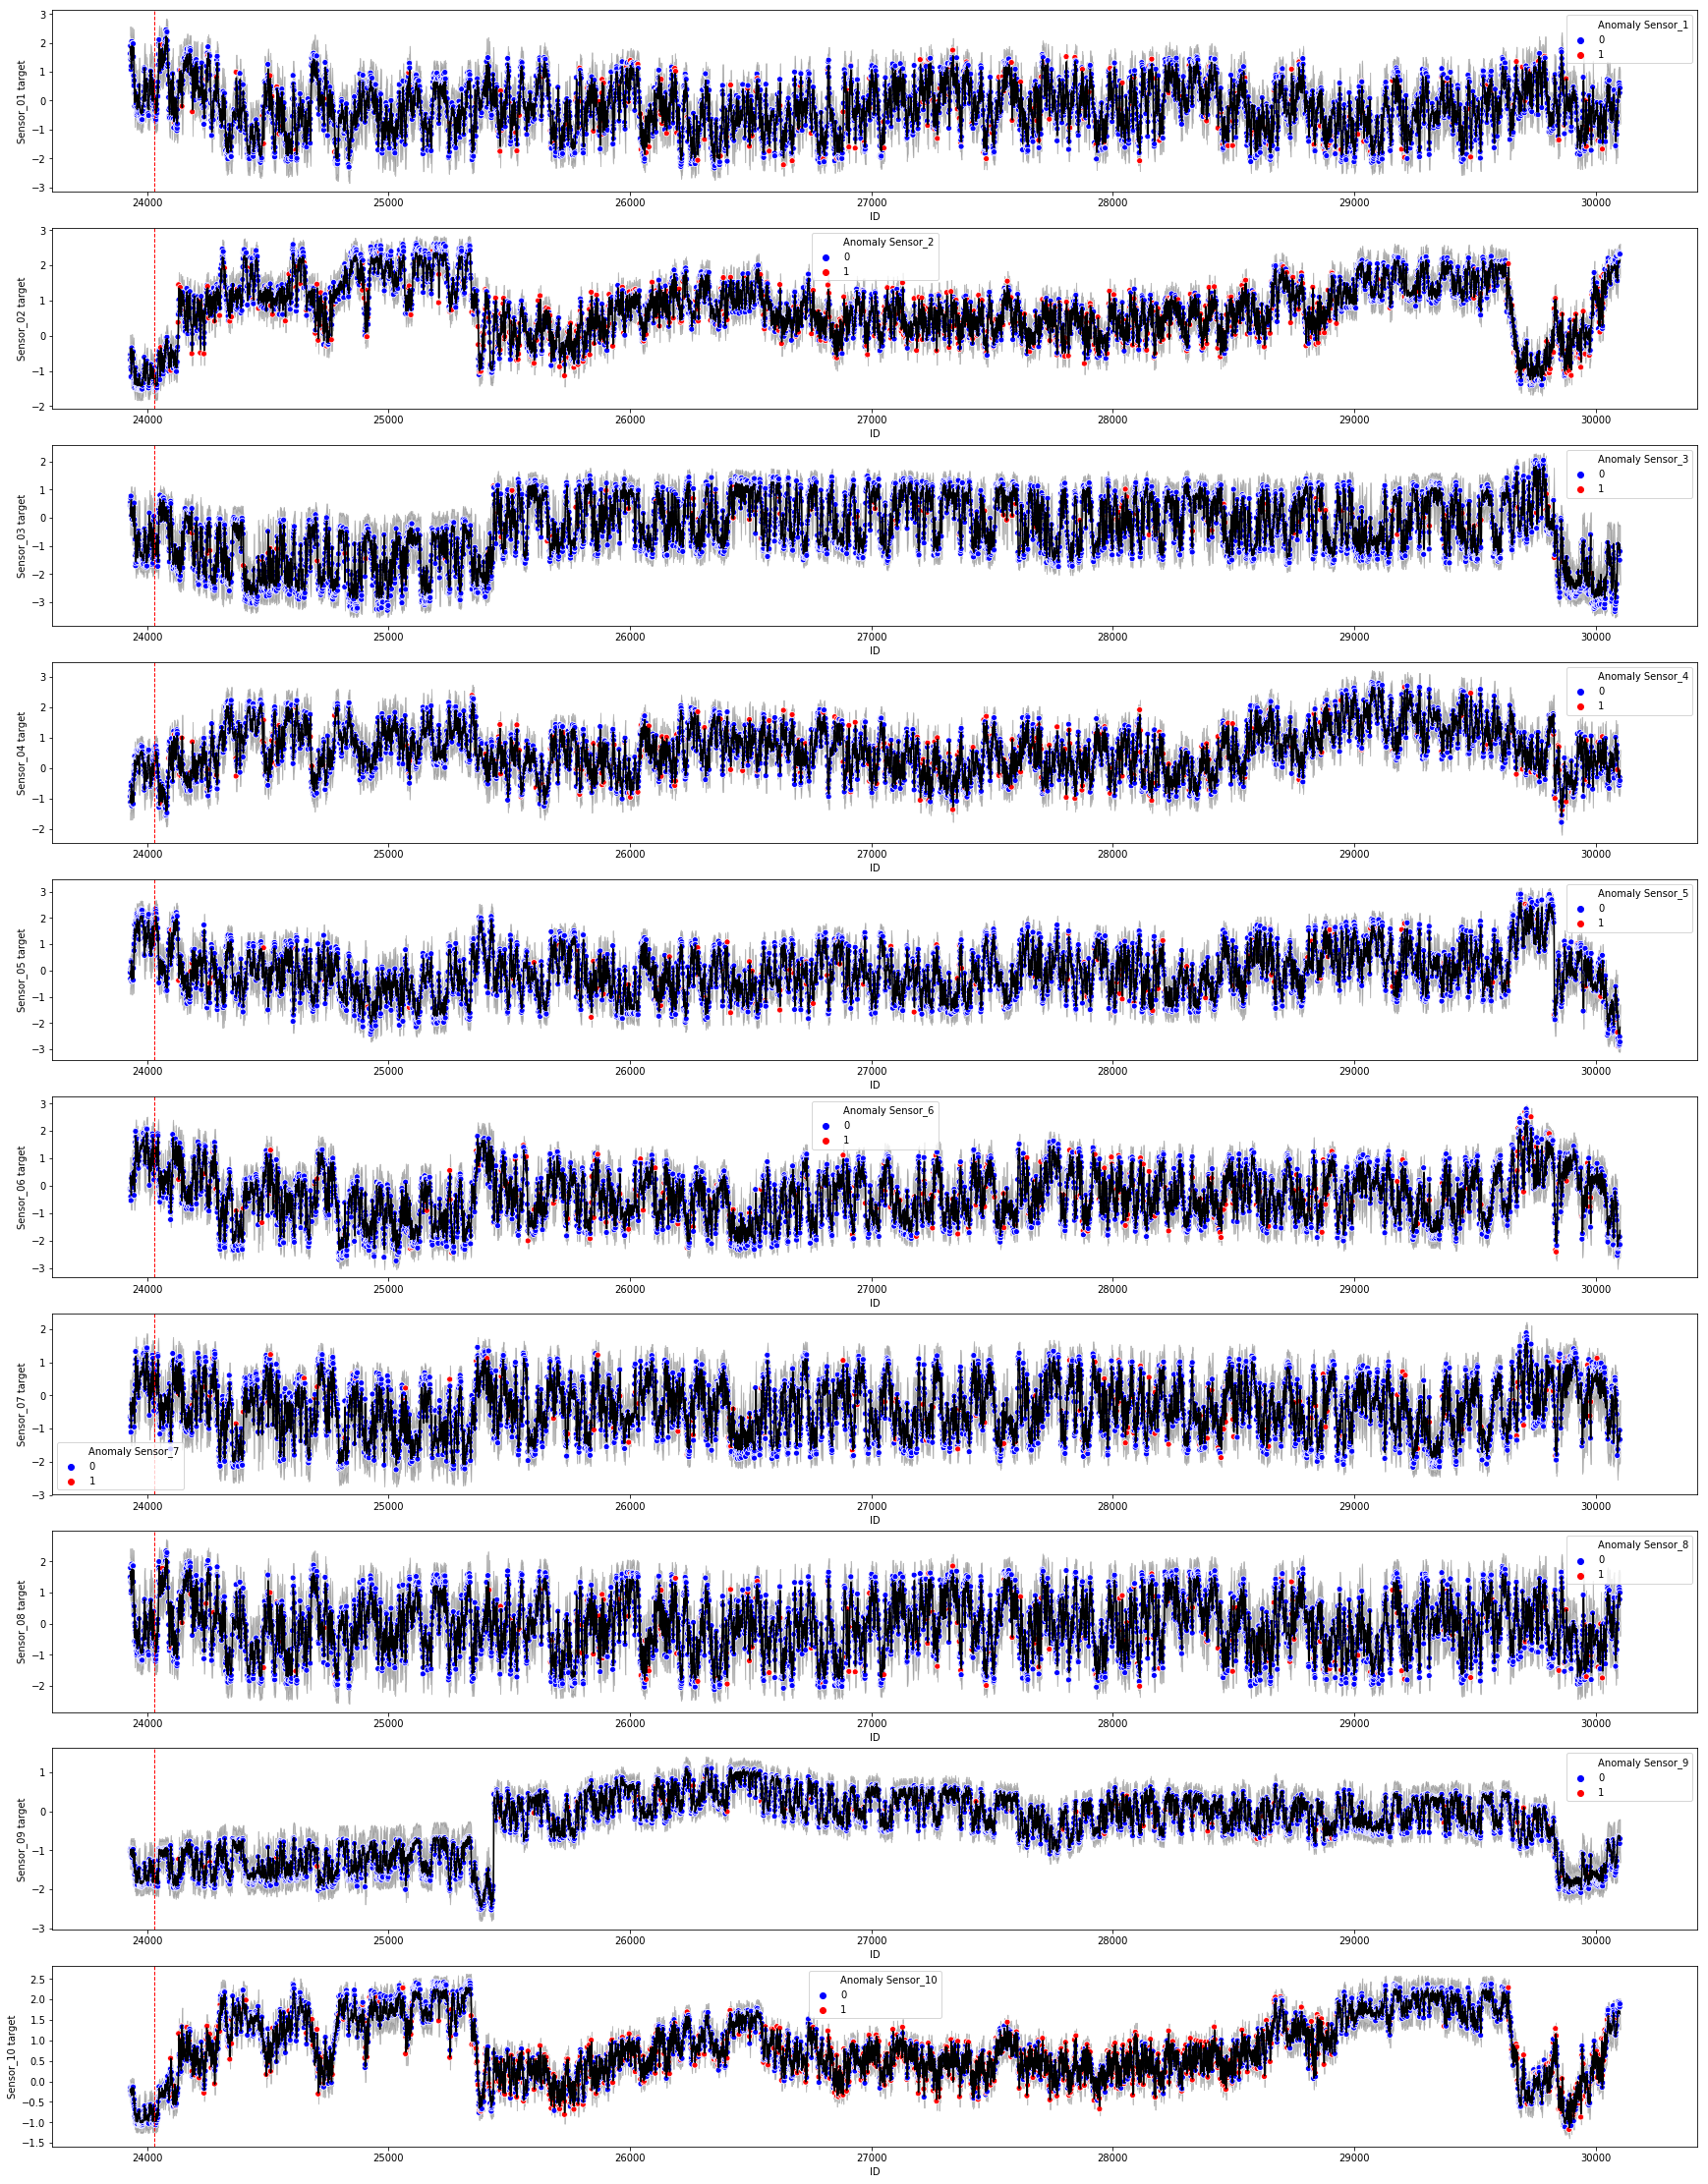

In [20]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 1 to Phase 2

In [21]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_degradation_09_with_label.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-100:38000,:]

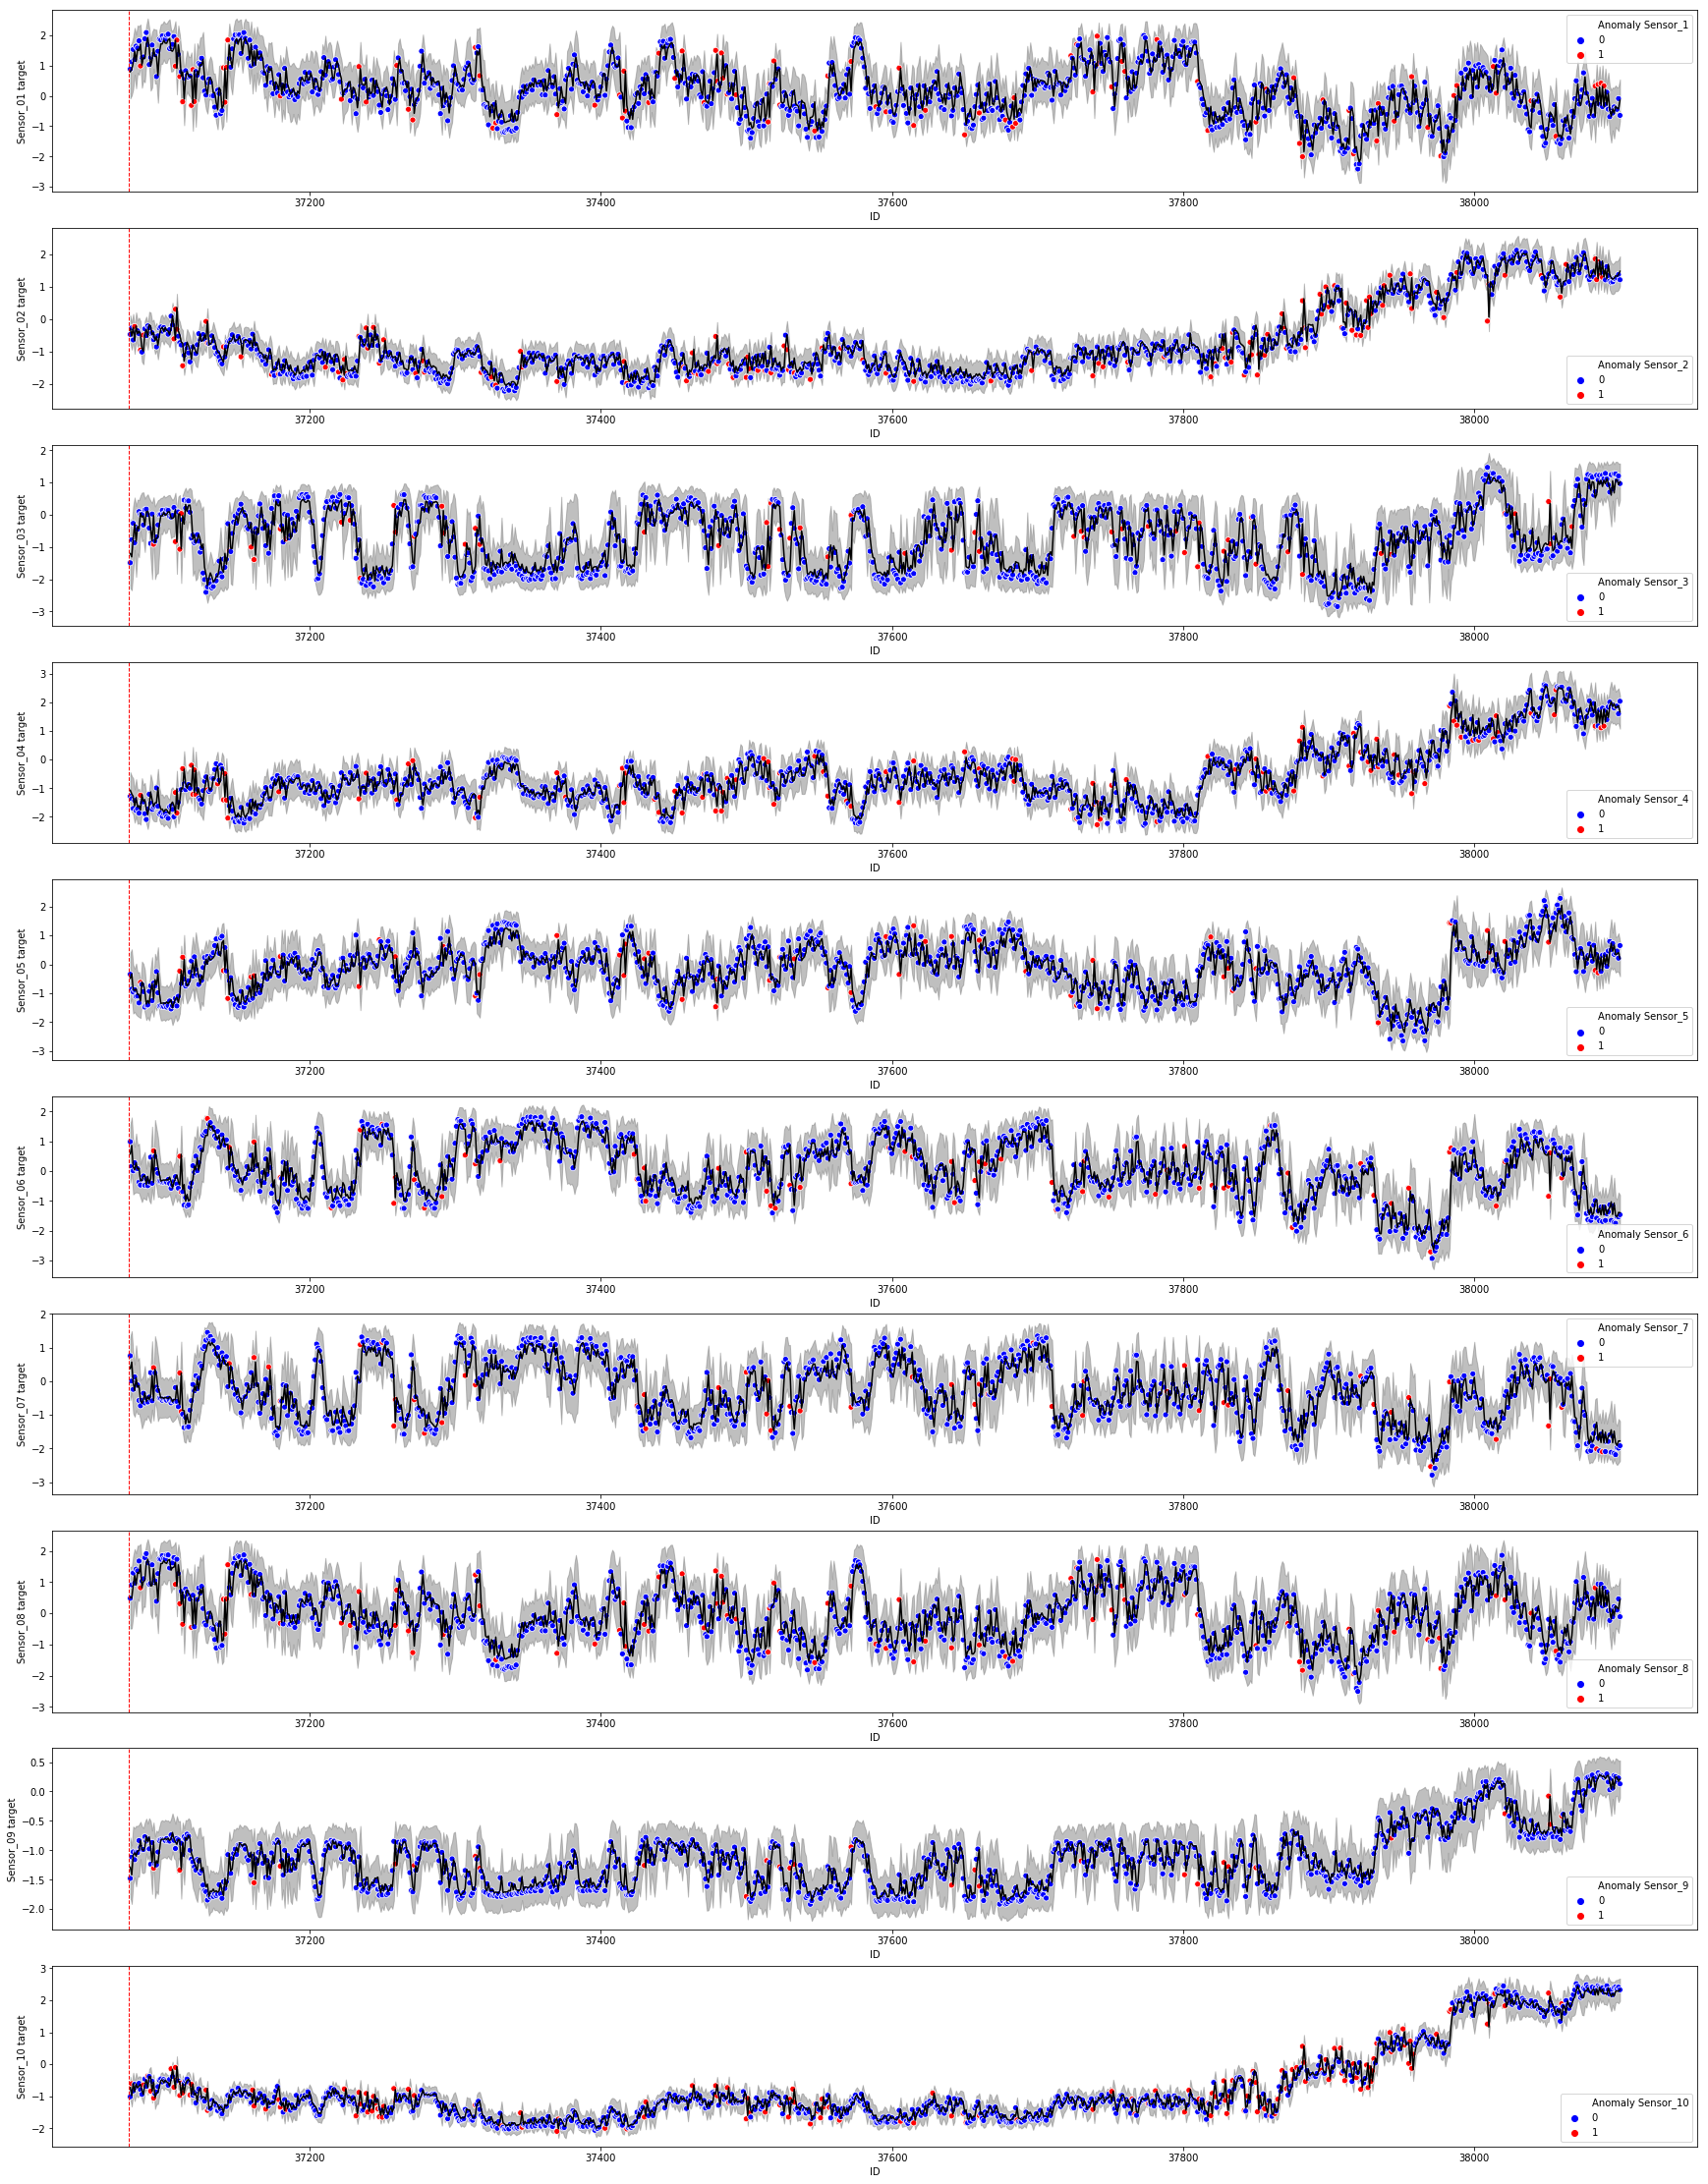

In [22]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_2
                        )
plt.show()

## Evaluation Metrics

In [54]:
all_data = pd.read_csv("../../files/prediction/MLE/cpps_degradation_09_with_label.csv", sep=";")

In [73]:
def vis_anomaly_detection(dataframe, no_features, first_feature, last_feature, location_line1, location_line2):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+4*no_features+1].cumsum(),
                     ax=ax[i-first_feature],
                     color="blue",)
        ax[i-first_feature].set_ylim(0, 5000) 
        ax[i-first_feature].axvline(location_line1, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].axvline(location_line2, color="r", linestyle ="--", linewidth=1)
        ax[i-first_feature].text(10000, 4000, "Phase 0: No Error", fontsize=15)
        ax[i-first_feature].text(27000, 4000, "Phase 1: Small Error", fontsize=15)
        ax[i-first_feature].text(40000, 4000, "Phase 2: Large Error", fontsize=15)

### Cumulative Sum of Anomaly, labeld by LSTM-Model

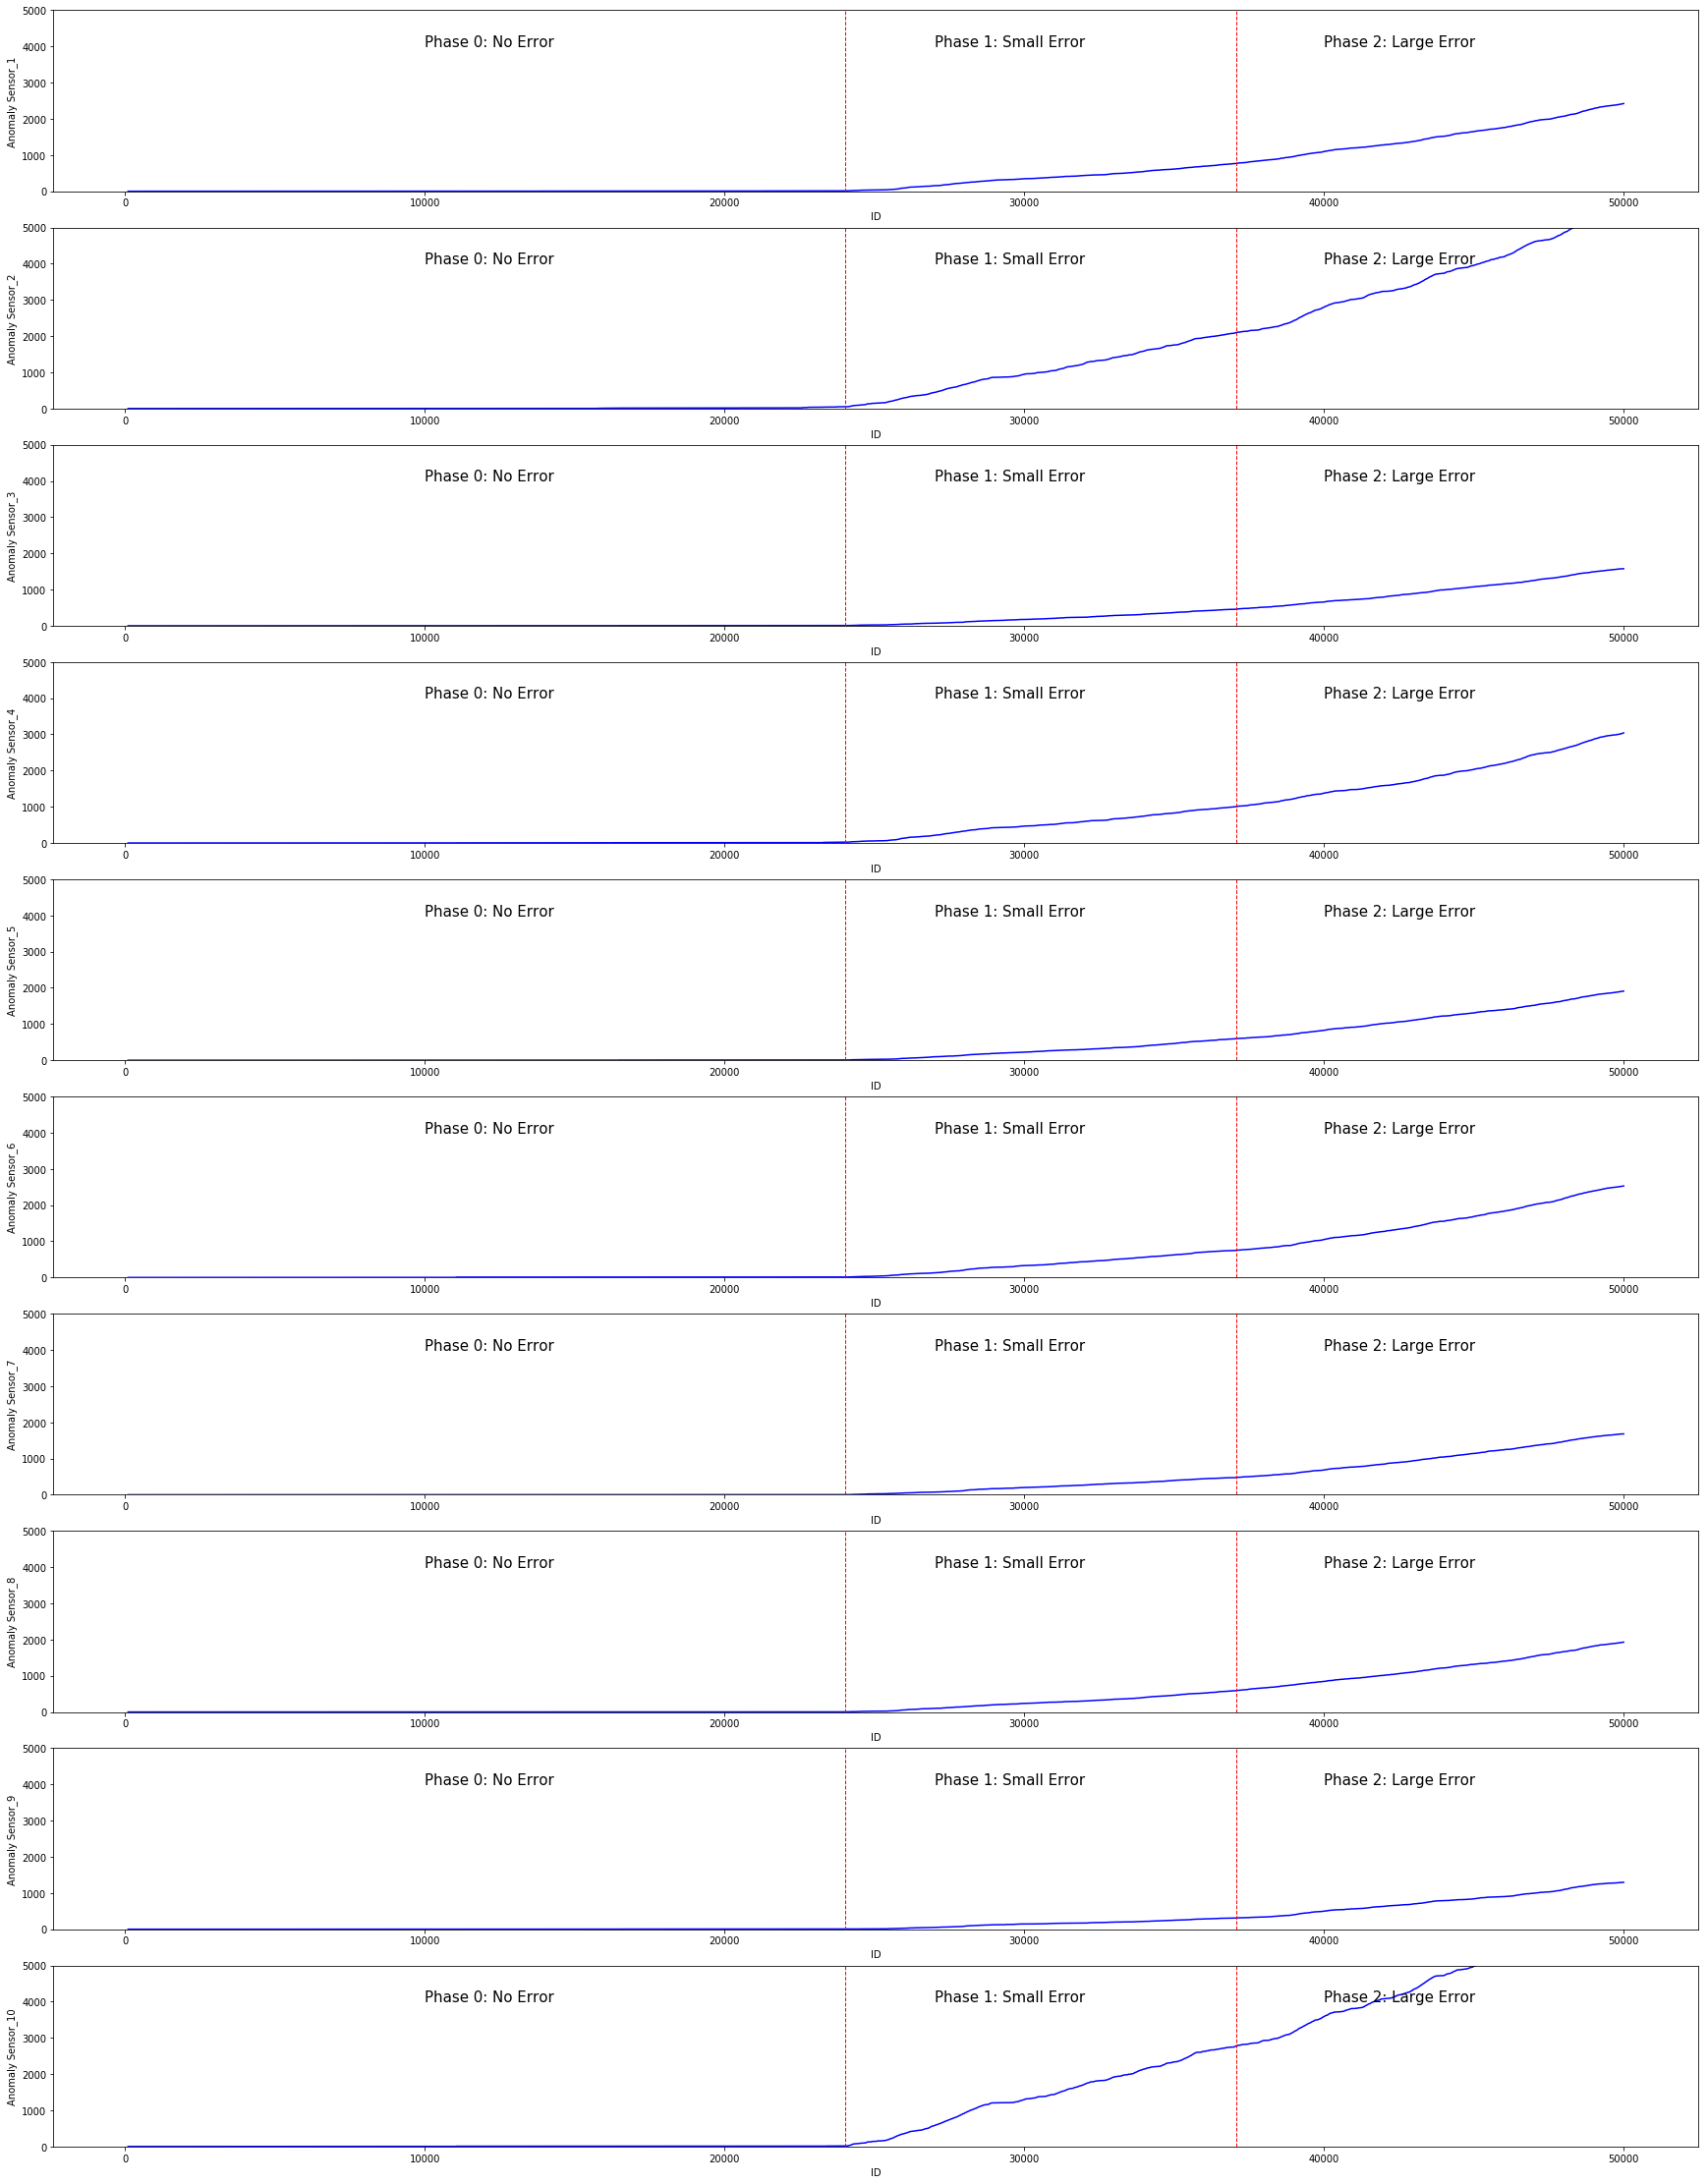

In [74]:
dataset_phase_0 = all_data.loc[all_data.status == 0]
vis_anomaly_detection(all_data, 10, 1, 11, start_phase_1, start_phase_2)
plt.show()